In [1]:
import os
import random
import shutil

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [6]:
from google.colab import files
uploaded = files.upload()

Saving project-6__surface-crack-detection-main.zip to project-6__surface-crack-detection-main.zip


In [7]:
import zipfile
import os

zip_path = 'project-6__surface-crack-detection-main.zip'  # change if your file has a different name
extract_path = 'project-6__surface-crack-detection-main/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Optional: list files to verify

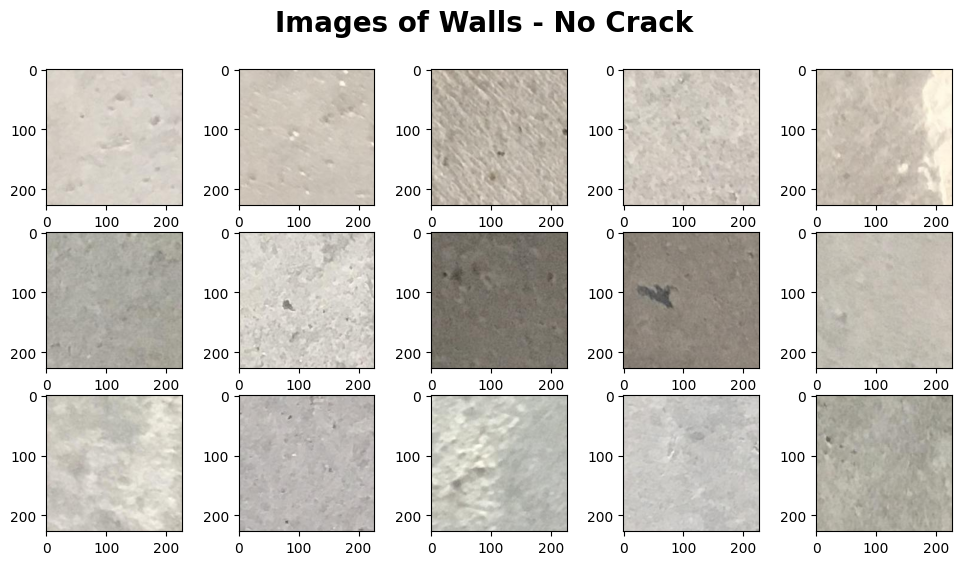

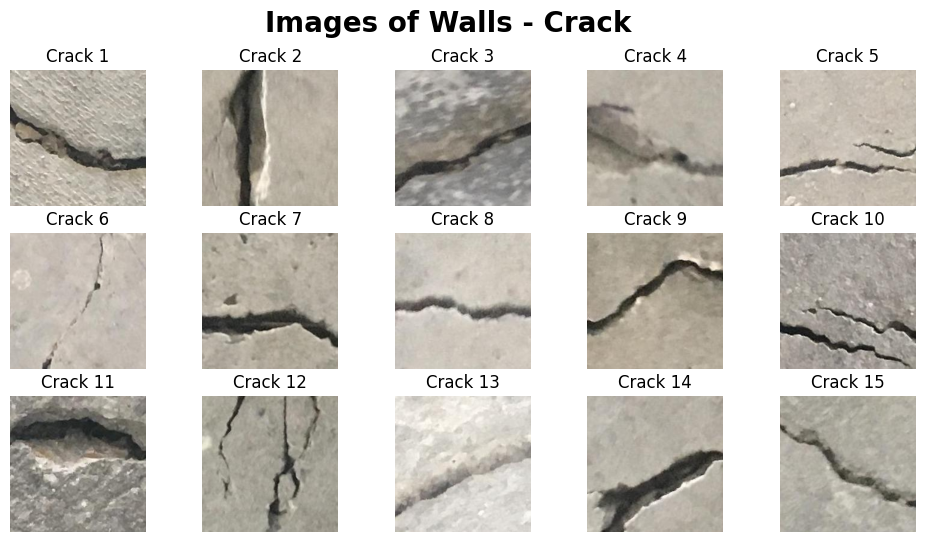

In [15]:
# Assign directory paths to negative and positive data
negative_dir = 'project/project/data/train/negative'
positive_dir = 'project/project/data/train/positive'

# Randomly pull fifteen negative images
negative_files = os.listdir(negative_dir)
random.shuffle(negative_files)
negative_files_random = negative_files[:15]

# Randomly pull fifteen positive images
positive_files = os.listdir(positive_dir)
random.shuffle(positive_files)
positive_files_random = positive_files[:15]

# Plot random negative images
fig, ax = plt.subplots(3, 5, figsize=(12, 6))
for i in range(len(negative_files_random)):
    row = i // 5
    col = i % 5
    image_path = os.path.join(negative_dir, negative_files_random[i])
    image = plt.imread(image_path)
    ax[row, col].imshow(image)
plt.suptitle("Images of Walls - No Crack", fontsize=20, fontweight='bold')
plt.show()
print("\n"*3)

# Plot random positive images
fig, ax = plt.subplots(3, 5, figsize=(12, 6))
for i in range(15):
    row = i // 5
    col = i % 5
    image_path = os.path.join(positive_dir, positive_files_random[i])
    image = plt.imread(image_path)
    ax[row, col].imshow(image)
    ax[row, col].axis('off')
    ax[row, col].set_title(f'Crack {i+1}')
plt.suptitle("Images of Walls - Crack", fontsize=20, fontweight='bold')
plt.show()

In [16]:
train_dir = 'project/project/data/train'
val_dir = 'project/project/data/val'
test_dir = 'project/project/data/test'
# Assign directory paths
train_positive_dir = 'project/project/data/train/positive'
train_negative_dir = 'project/project/data/train/negative'
val_positive_dir = 'project/project/data/val/positive'
val_negative_dir = 'project/project/data/val/negative'
test_positive_dir = 'project/project/data/test/positive'
test_negative_dir = 'project/project/data/test/negative'

# Create directories
os.makedirs(train_positive_dir, exist_ok=True)
os.makedirs(train_negative_dir, exist_ok=True)
os.makedirs(val_positive_dir, exist_ok=True)
os.makedirs(val_negative_dir, exist_ok=True)
os.makedirs(test_positive_dir, exist_ok=True)
os.makedirs(test_negative_dir, exist_ok=True)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data generators with pixel normalization
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# Create a dictionary to store each model's results
models_results_dict = {'Model':[],
                       'Accuracy':[],
                       'Precision':[],
                       'Recall':[]}

In [19]:
# Define train_data with hyperparameters
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1./255,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True).flow_from_directory(train_dir,
                                                                        target_size=(128, 128),
                                                                        batch_size=128,
                                                                        class_mode='binary',
                                                                        classes=['negative', 'positive'])

# Define val_data
val_data = val_datagen.flow_from_directory(val_dir,
                                           target_size=(128, 128),
                                           batch_size=128,
                                           class_mode='binary',
                                           classes=['negative', 'positive'],
                                           shuffle=False)

# Define test_data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(128, 128),
                                             batch_size=128,
                                             class_mode='binary',
                                             classes=['negative', 'positive'],
                                             shuffle=False)

Found 32000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Recall
# Define the model
model_1 = Sequential()

# Define layers
model_1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model_1.add(Flatten())
model_1.add(Dense(1, activation='sigmoid'))

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall()])

# Train the model
history_1 = model_1.fit(train_data,
                        epochs=1,
                        validation_data=val_data)

# Print model summary
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.7885 - loss: 1.5729 - recall: 0.7623 - val_accuracy: 0.9668 - val_loss: 0.1276 - val_recall: 0.9515


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 508032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       508,033 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,526,789 (5.82 MB)

 Trainable params: 508,929 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,017,860 (3.88 MB)

In [21]:
def plot_confusion_matrix(model, name, data_gen):
    """
    Plots the confusion matrix for a trained model and a given dataset.

    Parameters:
    - model: Trained Keras model.
    - name: String name for the model (for title).
    - data_gen: Data generator (validation/test set) with shuffle=False.
    """
    # Predict labels for validation data
    y_pred = model.predict(data_gen)

    # Handle binary and multi-class classification
    if y_pred.shape[1] == 1 or len(y_pred.shape) == 1:
        y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
    else:
        y_pred_classes = np.argmax(y_pred, axis=1)

    # True labels
    y_true = data_gen.classes  # true labels from generator

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

# Create a validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,    # 👉 REPLACE this with your actual validation dataset folder path
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False    # Important: do NOT shuffle for confusion matrix
)

Found 4000 images belonging to 2 classes.


In [23]:
# Create a train data generator
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,    # 👉 REPLACE this with your actual validation dataset folder path
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False    # Important: do NOT shuffle for confusion matrix
)

Found 32000 images belonging to 2 classes.


In [24]:
# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,    # 👉 REPLACE this with your actual validation dataset folder path
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False    # Important: do NOT shuffle for confusion matrix
)

Found 4000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step


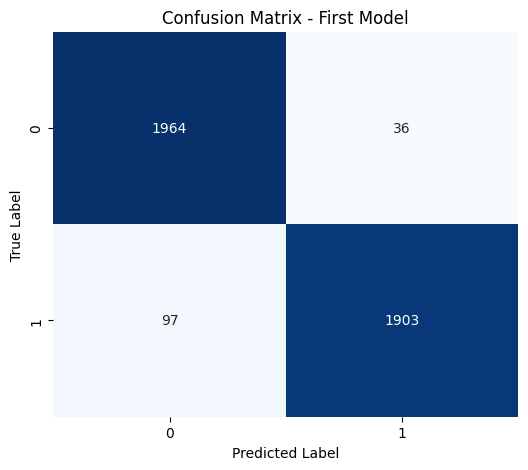

In [25]:
import seaborn as sns
plot_confusion_matrix(model_1, "First Model", validation_generator)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_model_metrics(model, model_name, test_data):
    y_pred = model.predict(test_data, verbose=1)
    y_pred = (y_pred > 0.5)  # Convert predictions to binary (0 or 1)
    y_true = test_data.classes  # This is how you access true labels from a data generator

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

In [27]:
print_model_metrics(model_1, "Third Model",test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 500ms/step
Model: Third Model
Accuracy: 0.9677
Precision: 0.9880
Recall: 0.9470
F1-Score: 0.9671


In [28]:
import pandas as pd

def save_model_metrics(model, model_name):
    # Get the model's performance metrics (from training history)
    history = model.history.history
    metrics_df = pd.DataFrame(history)

    # Save metrics to CSV
    metrics_df.to_csv(f"{model_name}_metrics.csv", index=False)
    print(f"Metrics for {model_name} saved to {model_name}_metrics.csv")

# Example usage:
save_model_metrics(model_1, "First_Model")

Metrics for First_Model saved to First_Model_metrics.csv


In [29]:
def save_model(model, model_name):
    # Save the entire model to a file
    model.save(f"{model_name}.h5")
    print(f"Model {model_name} saved to {model_name}.h5")

# Example usage:
save_model(model_1, "first_model")

Model first_model saved to first_model.h5


In [30]:
save_model_metrics(model_1, "First Model")

save_model(model_1, "first_model")

Metrics for First Model saved to First Model_metrics.csv
Model first_model saved to first_model.h5


In [41]:
import matplotlib.pyplot as plt

def plot_training_curves(history, test_acc=None, test_loss=None):
    """
    Plots training, validation, and optionally testing accuracy/loss curves.

    Parameters:
    - history: History object returned by model.fit()
    - test_acc: Scalar value of test accuracy (optional)
    - test_loss: Scalar value of test loss (optional)
    """
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    if test_acc is not None:
        # Plotting test accuracy as a horizontal line
        plt.axhline(y=test_acc, color='red', linestyle='--', label=f'Test Accuracy ({test_acc:.2f})')
    plt.title('Training, Validation & Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    if test_loss is not None:
        # Plotting test loss as a horizontal line
        plt.axhline(y=test_loss, color='red', linestyle='--', label=f'Test Loss ({test_loss:.2f})')
    plt.title('Training, Validation & Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [32]:
history = model_1.fit(train_generator,
                      validation_data=validation_generator,
                      epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 289s 289ms/step - accuracy: 0.9231 - loss: 0.5881 - recall: 0.9635 - val_accuracy: 0.9815 - val_loss: 0.2639 - val_recall: 0.9860
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 285s 285ms/step - accuracy: 0.9800 - loss: 0.2381 - recall: 0.9825 - val_accuracy: 0.9827 - val_loss: 0.1850 - val_recall: 0.9690
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 286s 286ms/step - accuracy: 0.9796 - loss: 0.1896 - recall: 0.9655 - val_accuracy: 0.9843 - val_loss: 0.1397 - val_recall: 0.9750
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 286s 286ms/step - accuracy: 0.9803 - loss: 0.1419 - recall: 0.9670 - val_accuracy: 0.9880 - val_loss: 0.1060 - val_recall: 0.9795
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 321s 285ms/step - accuracy: 0.9820 - loss: 0.1161 - recall: 0.9697 - val_accuracy: 0.9877 - val_loss: 0.0850 - val_recall: 0.9830
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 285s 285ms/step - accuracy: 0.9855 - loss: 0.0908 - recall: 0.9766 - val_accuracy: 0.9870 - val_loss: 0.0712 

In [39]:
test_loss, test_acc, test_recall = model_1.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print(f"Test Recall: {test_recall}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 555ms/step - accuracy: 0.9898 - loss: 0.0643 - recall: 0.5376
Test Loss: 0.05616633594036102
Test Accuracy: 0.9860000014305115
Test Recall: 0.9815000295639038


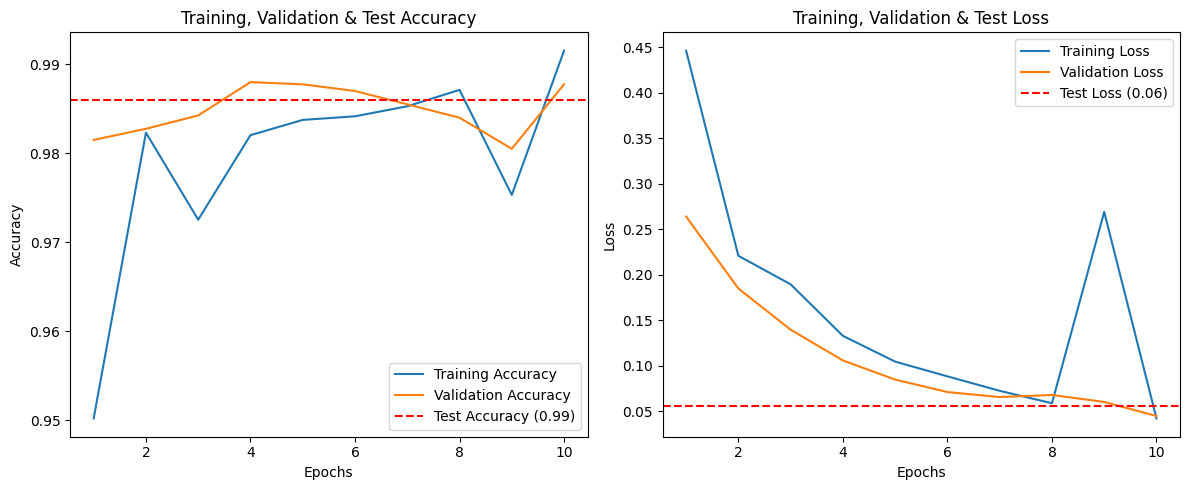

In [42]:
plot_training_curves(history,test_acc,test_loss)